In [3]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.2.0'

In [4]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive

In [8]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [9]:
import h5py

In [10]:
h5f=h5py.File('/content/drive/My Drive/dataset/SVHN_single_grey1.h5','r')

In [11]:
X_train=h5f['X_train'][:]
y_train=h5f['y_train'][:]
X_val=h5f['X_test'][:]
y_val=h5f['y_test'][:]

In [12]:
h5f.close()

In [13]:
X_train.shape

(42000, 32, 32)

In [14]:
y_train.shape


(42000,)

In [16]:
img_rows, img_cols = 32, 32

# tensorflow.keras expects data to be in the format (N_E.N_H,N_W,N_C)
# N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

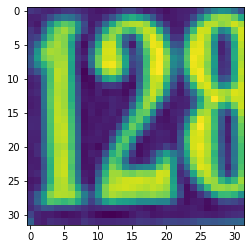

In [ ]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()

In [17]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

#Normalizing the input
X_train /= 255.0
X_val /= 255.0
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'test samples')

x_train shape: (42000, 32, 32, 1)
42000 train samples
18000 test samples


In [18]:
batch_size = 128
num_classes = 10
epochs = 12

In [19]:
from tensorflow.keras.utils import to_categorical

print("Value before encoding:", y_train[0])

y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One hot encoded value of y_train:", y_train[0])

Value before encoding: 2
Shape of y_train: (42000, 10)
One hot encoded value of y_train: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
# Initialize Sequential model
model = tensorflow.keras.models.Sequential()


model.add(tensorflow.keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Normalize the data
model.add(tensorflow.keras.layers.BatchNormalization())

In [21]:
# Hidden layers
model.add(tensorflow.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tensorflow.keras.layers.Dense(100, activation='relu', name='Layer_2'))

# Dropout layer
model.add(tensorflow.keras.layers.Dropout(0.5))

# Hidden layers
model.add(tensorflow.keras.layers.Dense(60, activation='relu', name='Layer_3'))
model.add(tensorflow.keras.layers.Dense(30, activation='relu', name='Layer_4'))

# Dropout layer
model.add(tensorflow.keras.layers.Dropout(0.3))

In [22]:
model.add(tensorflow.keras.layers.Dense(10, activation='softmax', name='Output'))

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
Layer_3 (Dense)              (None, 60)                6060      
_________________________________________________________________
Layer_4 (Dense)              (None, 30)                1

In [25]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size = 32)

Epoch 1/30
1313/1313 [==============================] - 7s 5ms/step - loss: 2.1406 - accuracy: 0.1941 - val_loss: 1.6071 - val_accuracy: 0.4620
Epoch 2/30
1313/1313 [==============================] - 7s 5ms/step - loss: 1.6997 - accuracy: 0.3943 - val_loss: 1.3024 - val_accuracy: 0.5825
Epoch 3/30
1313/1313 [==============================] - 7s 5ms/step - loss: 1.5137 - accuracy: 0.4775 - val_loss: 1.1493 - val_accuracy: 0.6467
Epoch 4/30
1313/1313 [==============================] - 7s 5ms/step - loss: 1.3492 - accuracy: 0.5511 - val_loss: 1.0344 - val_accuracy: 0.6878
Epoch 5/30
1313/1313 [==============================] - 7s 5ms/step - loss: 1.2156 - accuracy: 0.6125 - val_loss: 0.8885 - val_accuracy: 0.7356
Epoch 6/30
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1266 - accuracy: 0.6444 - val_loss: 0.8281 - val_accuracy: 0.7541
Epoch 7/30
1313/1313 [==============================] - 7s 5ms/step - loss: 1.0474 - accuracy: 0.6751 - val_loss: 0.7653 - val_accuracy:

In [28]:
model.evaluate(X_val, y_val)

563/563 [==============================] - 1s 2ms/step - loss: 0.5616 - accuracy: 0.8349


[0.5616286396980286, 0.8348888754844666]

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization, Dropout
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [36]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 20, verbose = 1)